In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

In [123]:
'''
Column Definitions
----------------------------------------------
age
sex 1=m, 2=f
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl, 1=true, 0=false
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
'''
#Read csv file and check first five rows.
heart_df = pd.read_csv("heart.csv", sep=',')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [124]:
#Rename columns

new_name = {'age': 'Age', 'sex': 'Sex', 'cp': 'Chest_Pain',
          'trestbps': 'Resting_Blood_Pressure', 'chol': 'Cholestoral',
          'fbs': 'Fasting_Blood_Sugar', 'restecg': 'Resting_ECG',
          'thalach': 'Max_Heart_Rate', 'exang': 'Exercise_Angine',
          'oldpeak': 'ST_Depression', 'slope': 'ST_Slope',
          'ca': 'Number_of_Vessels', 'thal': 'Thalassemia',
          'target': 'Heart_Disease'}
heart_df = heart_df.rename(columns=new_name)

In [125]:
#Check data types
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     303 non-null    int64  
 1   Sex                     303 non-null    int64  
 2   Chest_Pain              303 non-null    int64  
 3   Resting_Blood_Pressure  303 non-null    int64  
 4   Cholestoral             303 non-null    int64  
 5   Fasting_Blood_Sugar     303 non-null    int64  
 6   Resting_ECG             303 non-null    int64  
 7   Max_Heart_Rate          303 non-null    int64  
 8   Exercise_Angine         303 non-null    int64  
 9   ST_Depression           303 non-null    float64
 10  ST_Slope                303 non-null    int64  
 11  Number_of_Vessels       303 non-null    int64  
 12  Thalassemia             303 non-null    int64  
 13  Heart_Disease           303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.

In [126]:
#Check nulls in each attribute
heart_df.isnull().sum()

Age                       0
Sex                       0
Chest_Pain                0
Resting_Blood_Pressure    0
Cholestoral               0
Fasting_Blood_Sugar       0
Resting_ECG               0
Max_Heart_Rate            0
Exercise_Angine           0
ST_Depression             0
ST_Slope                  0
Number_of_Vessels         0
Thalassemia               0
Heart_Disease             0
dtype: int64

In [127]:
#Descriptive Statistics
heart_df.describe()

,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Cholestoral,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Angine,ST_Depression,ST_Slope,Number_of_Vessels,Thalassemia,Heart_Disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [128]:
#Removing outliers
from scipy import stats

z = np.abs(stats.zscore(heart_df))
heart_df_out = heart_df[(z < 3).all(axis=1)]

print("Original Dataframe Shape {}".format(heart_df.shape))
print("Removed Outlier Shape {}".format(heart_df_out.shape))


Original Dataframe Shape (303, 14)
Removed Outlier Shape (287, 14)


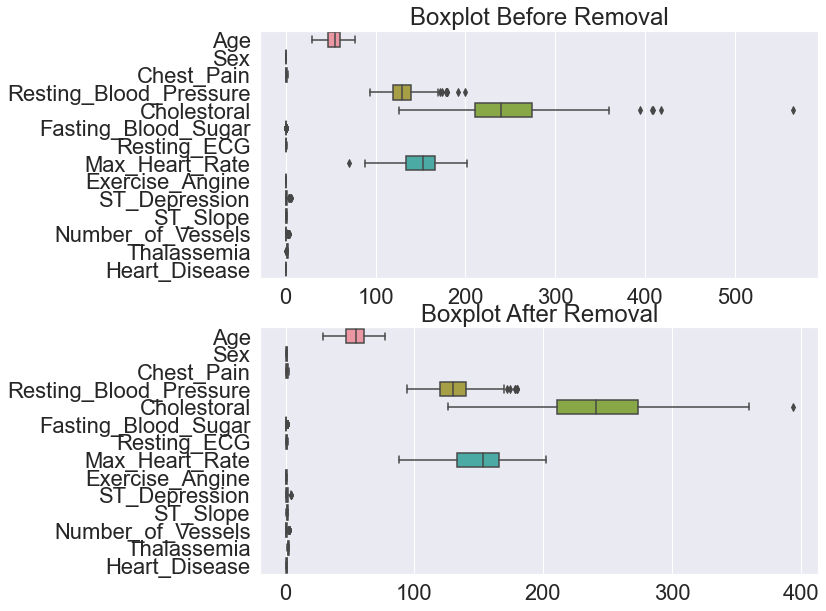

In [129]:
#Check visually if there are any outliers
fig, axs = plt.subplots(2, 1, figsize=(10,10))

sns.boxplot(ax = axs[0], data=heart_df, orient='h')
sns.boxplot(ax = axs[1], data=heart_df_out, orient='h')
axs[0].set_title('Boxplot Before Removal')
axs[1].set_title('Boxplot After Removal')
plt.show()

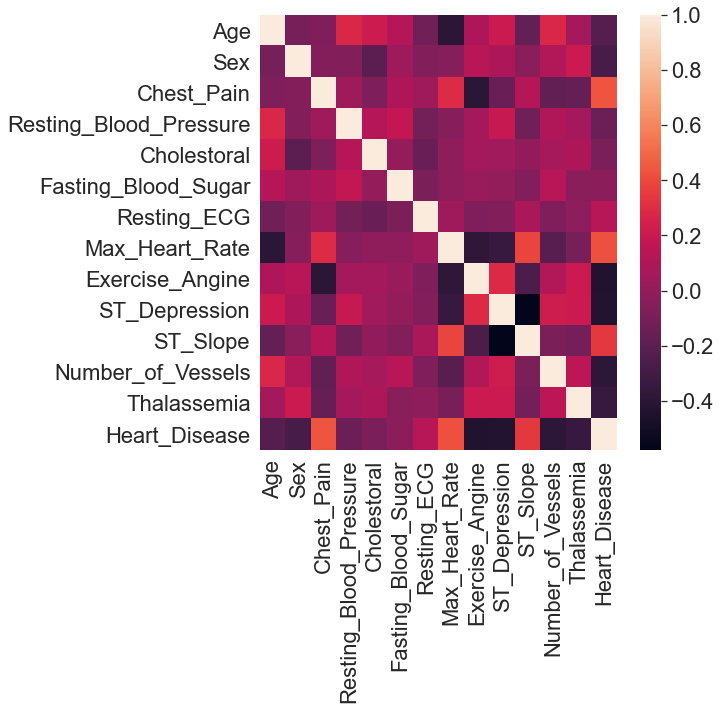

In [130]:
#Correlation matrix heatmap
plt.subplots(figsize=(8,8))
heart_corr = heart_df.corr()
sns.heatmap(heart_corr)
sns.set(font_scale=2)
plt.show()

In [131]:
#Convert into categorical data types

heart_df_out['Sex'] = heart_df_out['Sex'].astype('object')
heart_df_out['Chest_Pain'] = heart_df_out['Chest_Pain'].astype('object')
heart_df_out['Fasting_Blood_Sugar'] = heart_df_out['Fasting_Blood_Sugar'].astype('object')
heart_df_out['Resting_ECG'] = heart_df_out['Resting_ECG'].astype('object')
heart_df_out['Exercise_Angine'] = heart_df_out['Exercise_Angine'].astype('object')
heart_df_out['ST_Slope'] = heart_df_out['ST_Slope'].astype('object')
heart_df_out['Thalassemia'] = heart_df_out['Thalassemia'].astype('object')

print(heart_df_out.dtypes)

Age                         int64
Sex                        object
Chest_Pain                 object
Resting_Blood_Pressure      int64
Cholestoral                 int64
Fasting_Blood_Sugar        object
Resting_ECG                object
Max_Heart_Rate              int64
Exercise_Angine            object
ST_Depression             float64
ST_Slope                   object
Number_of_Vessels           int64
Thalassemia                object
Heart_Disease               int64
dtype: object


In [132]:
#Choosing variables to train and to test

X = np.array(heart_df_out.drop(['Heart_Disease'], 1))
y = np.array(heart_df_out['Heart_Disease'])

In [133]:
#Splitting data to training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X , y, test_size = 0.30, random_state=420)

print("X_train shape{}".format(X_train.shape))
print("y_train shape{}".format(y_train.shape))

X_train shape(200, 13)
y_train shape(200,)


In [134]:
#Creating a classification decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=5, random_state=88).fit(X_train, y_train)

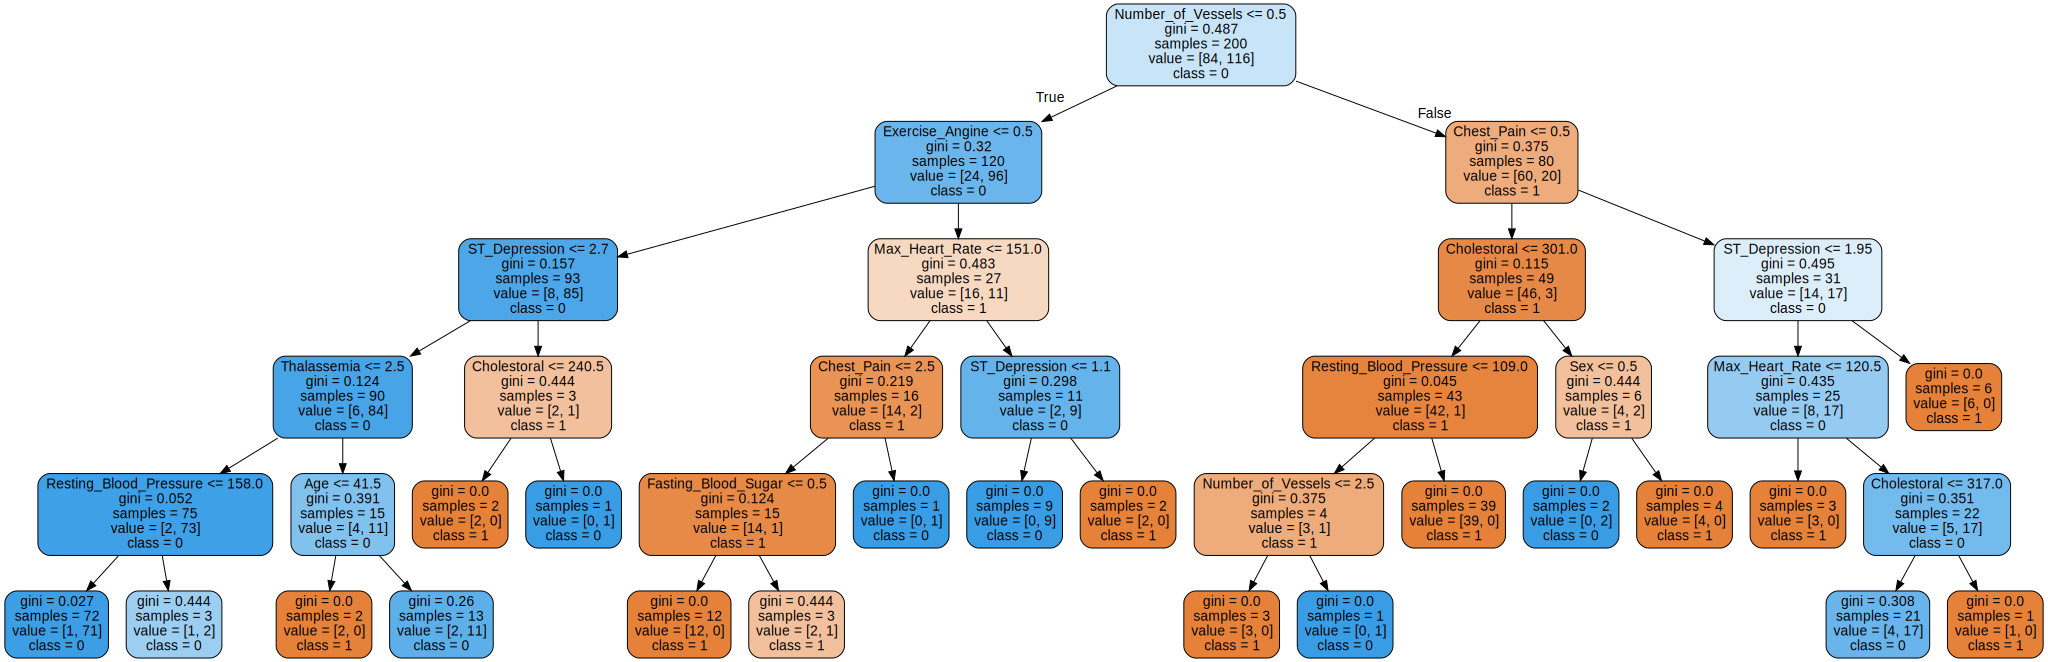

In [135]:
#Creating graphics for classification decision tree
import graphviz

class_name = 'Heart_Disease'
feature_names = heart_df_out.columns[heart_df_out.columns != class_name]
class_values = heart_df_out[class_name].unique().astype('str')

dot_data = tree.export_graphviz(clf, out_file=None,
                feature_names = feature_names,
                class_names = class_values,
                rounded = True, filled = True)

graph = graphviz.Source(dot_data)
graph

In [136]:
#Predict data values from tested date
y_pred = clf.predict(X_test)

In [137]:
#Creating Confusion Matrix
from sklearn.metrics import confusion_matrix

cf=confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cf)

tn, fn, tp, fp = cf.ravel()
print("True Negative {} False Negative {} \n"
      "True Positive {} False Positive {} \n".format(tn, fn, tp, fp))

Confusion Matrix
[[31 14]
 [ 9 33]]
True Negative 31 False Negative 14 
True Positive 9 False Positive 33 



In [138]:
#Creating Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73        45
           1       0.70      0.79      0.74        42

    accuracy                           0.74        87
   macro avg       0.74      0.74      0.74        87
weighted avg       0.74      0.74      0.74        87



In [139]:
#Creating a Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

LogR = make_pipeline(StandardScaler(), LogisticRegression())
LogR.fit(X_train,y_train)
print("Accuracy of Logistic Regression on test set: {}".format(LogR.score(X_test, y_test)))

Accuracy of Logistic Regression on test set: 0.7816091954022989


In [140]:
#Confusion matrix and Classification Report for Logistic Regression
y_log_pred = LogR.predict(X_test)

log_cf = confusion_matrix(y_test, y_log_pred)
print("Confusion Matrix")
print(log_cf)

tn, fn, tp, fp = log_cf.ravel()
print("True Negative {} False Negative {} \n"
      "True Positive {} False Positive {} \n".format(tn, fn, tp, fp))

print(classification_report(y_test, y_log_pred))

Confusion Matrix
[[35 10]
 [ 9 33]]
True Negative 35 False Negative 10 
True Positive 9 False Positive 33 

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        45
           1       0.77      0.79      0.78        42

    accuracy                           0.78        87
   macro avg       0.78      0.78      0.78        87
weighted avg       0.78      0.78      0.78        87



In [141]:
#Overall results are similar with Decision Tree and Logistic Regression